In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
data = pd.read_csv('abalone.data.csv')
data = data.set_axis(['Sex', 'Length ', 'Diameter', 'Height', 'Whole weight','Shucked weight ','Viscera weight','Shell weight','Rings'], axis=1, inplace=False)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [10]:
data = data.drop("Sex", axis=1)

X = data
X = X.drop("Rings", axis=1)

Y = data['Rings']

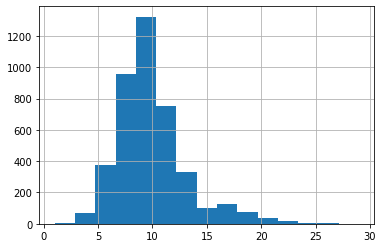

In [11]:
Y.hist(bins = 15)
plt.show()

In [12]:
correlation_matrix = data.corr()
correlation_matrix["Rings"]

Length             0.557123
Diameter           0.575005
Height             0.558109
Whole weight       0.540818
Shucked weight     0.421256
Viscera weight     0.504274
Shell weight       0.628031
Rings              1.000000
Name: Rings, dtype: float64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [15]:
kNN = KNeighborsClassifier(n_neighbors=9)
kNN.fit(X_train, Y_train)
pred = kNN.predict(X_test)
pred

C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ 7,  8,  7,  8,  8, 10, 11,  8,  8,  7,  4, 11, 11,  9,  9, 10,  9,
        7,  9, 10,  8, 11,  7,  7,  9,  8, 10, 11,  8,  7,  9, 12, 10,  7,
        9,  9,  9, 12,  7, 10,  8,  7, 12,  7, 14,  9, 11,  6, 17,  7, 10,
        5, 11, 10,  9,  8,  9,  7,  9, 10,  8, 11,  9, 13,  9, 11,  6,  7,
        9,  8,  9,  7,  6,  8,  8, 11, 11, 12, 11,  6, 10,  9,  9,  8, 12,
       10,  3,  8, 10,  8, 10,  6, 11,  9,  9, 10, 10, 11,  9,  5,  8,  9,
        6,  9,  4,  8,  8,  6, 16,  9,  8, 12, 12,  6,  6,  9,  9,  8,  8,
        6,  6, 10,  7, 10,  9,  5,  6, 12, 11, 10,  8,  4, 10, 10,  7, 11,
       10,  8, 11,  9,  7,  7,  7,  8,  7, 15,  9,  7,  8, 11,  8,  8,  9,
        9, 16,  6, 10, 10, 10, 11, 11,  9, 14,  9,  7,  8,  7,  9,  9, 12,
        9,  8, 11, 12,  8,  7,  8,  9,  9,  8,  7, 10, 13, 17, 10,  3, 11,
        5,  9, 12,  8, 10,  8, 10,  6,  8,  9,  5,  5,  9,  7, 11,  8,  6,
        8, 17,  6,  9,  9, 15,  9,  6, 10,  7, 10, 10, 11, 13, 10,  4, 11,
       10,  9,  9,  9,  9

In [16]:
evaluation = (pred == Y_test).sum() / len(Y_test)
evaluation

0.23086124401913877

In [17]:
metric = metrics.classification_report(Y_test,pred)
print(metric)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.38      0.30      0.33        10
           5       0.35      0.35      0.35        26
           6       0.27      0.31      0.29        45
           7       0.31      0.39      0.35        79
           8       0.33      0.34      0.34       117
           9       0.20      0.34      0.25       120
          10       0.19      0.24      0.21       120
          11       0.24      0.18      0.21       111
          12       0.08      0.07      0.07        45
          13       0.07      0.02      0.03        47
          14       0.29      0.07      0.11        28
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.00        17
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         9
          19       0.00      0.00      0.00        11
          20       0.00    

C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ali Yaghoubian\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi